In [628]:
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import math
#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [629]:
A = pd.DataFrame({'가구원 수(명)' : [4.06 , 1.02] , '외식비(원)' : [175420 , 33250]})
A.index = ['|x' , 's']
A

,가구원 수(명),외식비(원)
|x,4.06,175420
s,1.02,33250


In [630]:
A.describe()

,가구원 수(명),외식비(원)
count,2.000000,2.000000
mean,2.540000,104335.000000
std,2.149605,100529.371081
min,1.020000,33250.000000
25%,1.780000,68792.500000
50%,2.540000,104335.000000
75%,3.300000,139877.500000
max,4.060000,175420.000000


In [631]:
a =  pd.DataFrame([(A.iloc[1,0]/A.iloc[0,0])*100, (A.iloc[1,1]/A.iloc[0,1])*100])
a
# # a.transpose()
a = a.transpose()
a = a.rename(columns = {0 : A.columns[0] , 1 : A.columns[1]})
a
a.index= ['변동계수']
A = pd.concat([A ,a])
A
# a[['계급값(x_i)', 'x_i - |x' , '(x_i - |x)**2', 'f_i_x_i'] ] = '-'
# a

,가구원 수(명),외식비(원)
|x,4.060000,175420.000000
s,1.020000,33250.000000
변동계수,25.123153,18.954509


In [632]:
company = ['삼성전자' , 'SK텔레콤' , 'LG전자' , 'GS칼텍스' , '롯데쇼핑' , '현대자동차' , '현대케미칼' , '대한항공' , '포스코' , '현대중공업']
SALARY = [10200,10500,6900,9107,3353,9400,6779,6400,7900,7232]
YEAR = [9.3,12.4,8.5,14.6,5.7,16.8,12.2,13.8,18.5,18.0]

B = pd.DataFrame({'회사명' : company , '평균 연봉(만 원)' : SALARY , '근속 연수(년)' : YEAR})
B = B.set_index('회사명')
B

,평균 연봉(만 원),근속 연수(년)
회사명,,
삼성전자,10200,9.3
SK텔레콤,10500,12.4
LG전자,6900,8.5
GS칼텍스,9107,14.6
롯데쇼핑,3353,5.7
현대자동차,9400,16.8
현대케미칼,6779,12.2
대한항공,6400,13.8
포스코,7900,18.5


In [633]:
SALARY_CV = np.std(B.iloc[:,0] , ddof =1) / np.mean(B.iloc[:,0])
YEAR_CV = np.std(B.iloc[:,1] , ddof =1) / np.mean(B.iloc[:,1])

b = pd.DataFrame(['변동계수(CV)' , SALARY_CV , YEAR_CV])
b = b.transpose().set_index(0)
b  = b.rename(columns = {1 : B.columns[0] , 2 : B.columns[1]})
B = pd.concat([B,b])
B

,평균 연봉(만 원),근속 연수(년)
삼성전자,10200,9.3
SK텔레콤,10500,12.4
LG전자,6900,8.5
GS칼텍스,9107,14.6
롯데쇼핑,3353,5.7
현대자동차,9400,16.8
현대케미칼,6779,12.2
대한항공,6400,13.8
포스코,7900,18.5
현대중공업,7232,18.0


In [634]:
A = [90,85,75,77,83]
MEAN = np.mean(A)
STD = np.std(A , ddof =1)
print(STD)
A = pd.DataFrame(A)
A.describe()

6.082762530298219


,0
count,5.000000
mean,82.000000
std,6.082763
min,75.000000
25%,77.000000
50%,83.000000
75%,85.000000
max,90.000000


In [635]:
A = A.rename(columns = {0 : 'x_i'})
A['x_i - |x'] = A['x_i'] - MEAN
A['z_i = (x_i - |x)/ s'] = A['x_i - |x'] / STD
A

,x_i,x_i - |x,z_i = (x_i - |x)/ s
0,90,8.0,1.315192
1,85,3.0,0.493197
2,75,-7.0,-1.150793
3,77,-5.0,-0.821995
4,83,1.0,0.164399


In [636]:
A = [562 , 549]

A = pd.DataFrame(A)
A['Z-SCORE'] = (A[0] - 555) / 68
A

,0,Z-SCORE
0,562,0.102941
1,549,-0.088235


In [637]:
A = [67,84,79,62,78,36,38,57,48,87,83,90,60,25,50,94,60,62,97,43]
A = sorted(A)
A

[25,
 36,
 38,
 43,
 48,
 50,
 57,
 60,
 60,
 62,
 62,
 67,
 78,
 79,
 83,
 84,
 87,
 90,
 94,
 97]

In [638]:
print(len(A))

n = len(A)
k =  30
m = n*k / 100
print(m)

P_30 = (A[5]+ A[6]) / 2 #6번째수 , 7번째수
print("30-백분위수 : {}".format(P_30)) # 30-백분위수

k = 25
m = int(n*k / 100)
P_25 = (A[m-1] + A[m]) / 2
print("25-백분위수 : {}".format(P_25)) #25-백분위수

k = 50
m = int(n*k / 100)
P_50 = (A[m-1] + A[m]) / 2
print("50-백분위수 : {}".format(P_50)) #50-백분위수

k = 75
m = int(n*k / 100)
P_75 = (A[m-1] + A[m]) / 2
print("75-백분위수 : {}".format(P_75)) #75-백분위수


20
6.0
30-백분위수 : 53.5
25-백분위수 : 49.0
50-백분위수 : 62.0
75-백분위수 : 83.5


In [639]:
A = [161,144,129,162,186,163,138,172,148,157,183,129,160,152,150,194,136,122,197,143,145,176,181,157,189]
A = sorted(A)
print(len(A))


25


In [640]:
n = len(A)
k = [70, 25 ,50 ,75]
for i in k:
    m = int(n*i /100)
    print(m)
    print("{}-백분위수 : {}".format(i, (A[m-1] + A[m]) /2))



17
70-백분위수 : 167.5
6
25-백분위수 : 143.5
12
50-백분위수 : 157.0
18
75-백분위수 : 174.0


In [641]:
A = [49.6,50.5,49.9,51.6,49.6,48.7,49.7,49.1,48.7,51.0,
     50.1,48.7,50.4,50.6,51.5,49.4,51.1,49.8,49.8,49.0,
     46.2,50.4,49.1,50.5,50.9,49.8,49.6,49.3,50.5,50.2,
     52.0,50.7,50.4,48.6,50.9,51.2,50.7,48.5,50.0,51.3,
     47.6,49.1,51.0,51.9,49.5,49.7,48.6,49.7,48.5,48.3]

A = sorted(A)
B = pd.DataFrame(A)
B

,0
0,46.2
1,47.6
2,48.3
3,48.5
4,48.5
5,48.6
6,48.6
7,48.7
8,48.7
9,48.7


49.1
49.8
50.7
Q1 : 49.1
Q2 : 49.8
Q3 : 50.7
IQR: 1.6
fl : 46.7
fu : 53.1
fL : 44.3
fU : 55.5
B.quantile(0)[0] : 46.2
B.quantile(1)[0] : 52.0
B.quantile(.25)[0] : 49.1


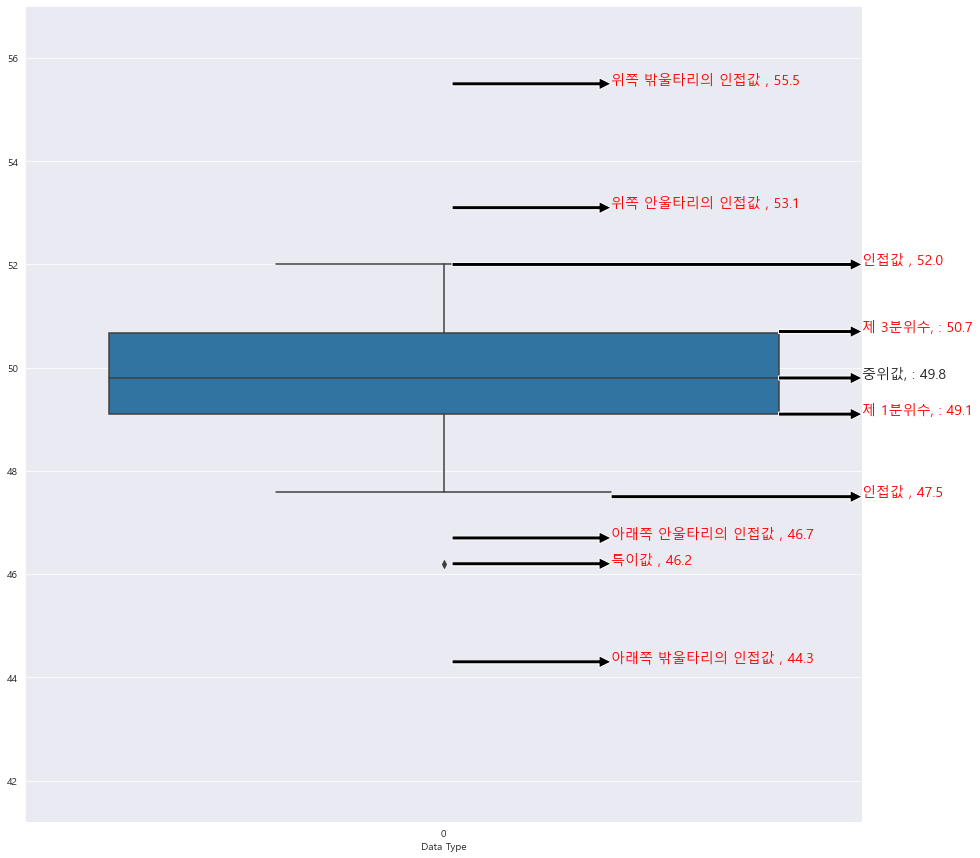

In [642]:
fig = plt.figure(figsize=(15,15))

ax = sns.boxplot(data = B)



n = len(B)
k = [25,50,75] #Q1
for i in k:
    m = int((n*i) / 100)
    P_25 = round((A[m-1] + A[m]) /2 ,1)
    print(P_25)


Q1 = round(B.quantile(.25)[0] , 1)
Q2 = round(B.quantile(.5)[0] , 1)
Q3 = round(B.quantile(.75)[0] , 1)
print("Q1 : {}".format(Q1))
print("Q2 : {}".format(Q2))
print("Q3 : {}".format(Q3))
IQR = round(Q3 - Q1 , 1) #1.6
print("IQR: {}".format(IQR))

fl = round(Q1 - (1.5) * IQR ,1) #아래쪽 안 울타리
print('fl : {}'.format(fl))
fu = round(Q3 +(1.5) * IQR,1) #위쪽 안 울타리
print('fu : {}'.format(fu))
fL = round(Q1 - 3*IQR,1) #아래쪽 밖 울타리
print('fL : {}'.format(fL))
fU = round(Q3 + 3*IQR,1) #위쪽 밖 울타리
print('fU : {}'.format(fU))

print("B.quantile(0)[0] : {}".format(B.quantile(0)[0]))
print("B.quantile(1)[0] : {}".format(B.quantile(1)[0]))
print("B.quantile(.25)[0] : {}".format(B.quantile(.25)[0]))
ax.set_ylim(B.quantile(0)[0] -5, B.quantile(1)[0] +5)
ax.set_xlabel('Data Type')
plt.annotate('' , xy=(0.5, np.median(B)), xytext=(0.4 , np.median(B))  , arrowprops = dict(facecolor = 'black'))
plt.text(0.5, np.median(B), '중위값, : {}'.format(B.quantile(.5)[0]), fontsize=14)


plt.annotate('' , xy=(0.5, Q1), xytext=(0.4 , Q1)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.5, Q1, '제 1분위수, : {}'.format(Q1), fontsize=14 , color= 'red')

plt.annotate('' , xy=(0.5, Q3), xytext=(0.4 , Q3)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.5, Q3, '제 3분위수, : {}'.format(Q3), fontsize=14 , color= 'red')

plt.annotate('' , xy=(0.5, round(B.quantile(1)[0] ,1)), xytext=(0.01 , round(B.quantile(1)[0] ,1))  , arrowprops = dict(facecolor = 'black'))
plt.text(0.5, round(B.quantile(1)[0] ,1), '인접값 , {}'.format(round(B.quantile(1)[0] ,1)), fontsize=14, color= 'red' )

plt.annotate('' , xy=(0.5, Q1 - IQR), xytext=(0.2 , Q1 - IQR)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.5, Q1 - IQR, '인접값 , {}'.format(Q1 - IQR), fontsize=14, color= 'red' ) #왜 다를까?

plt.annotate('' , xy=(0.2, round(B.quantile(0)[0] , 1)), xytext=(0.01, round(B.quantile(0)[0] , 1))  , arrowprops = dict(facecolor = 'black'))
plt.text(0.2, round(B.quantile(0)[0] , 1), '특이값 , {}'.format(round(B.quantile(0)[0] , 1)), fontsize=14 , color= 'red')

plt.annotate('' , xy=(0.2, fl), xytext=(0.01, fl)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.2, fl, '아래쪽 안울타리의 인접값 , {}'.format(fl), fontsize=14 , color= 'red')


plt.annotate('' , xy=(0.2, fu), xytext=(0.01, fu)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.2, fu, '위쪽 안울타리의 인접값 , {}'.format(fu), fontsize=14 , color= 'red')


plt.annotate('' , xy=(0.2, fU), xytext=(0.01, fU)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.2, fU, '위쪽 밖울타리의 인접값 , {}'.format(fU), fontsize=14 , color= 'red')


plt.annotate('' , xy=(0.2, fL), xytext=(0.01, fL)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.2, fL, '아래쪽 밖울타리의 인접값 , {}'.format(fL), fontsize=14 , color= 'red')



plt.show()

Text(0, 0.5, 'Value')

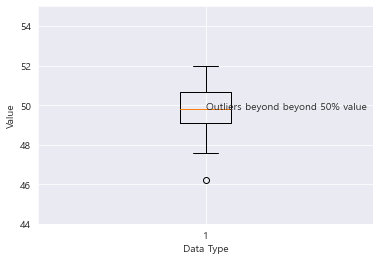

In [643]:
fig , ax = plt.subplots()

ax.boxplot(B)
ax.set_ylim(44.0, 55.0)
ax.set_xlabel('Data Type')
plt.text(1, np.median(B), 'Outliers beyond beyond 50% value', fontsize=10)
ax.set_ylabel('Value')

In [644]:
A = [55,48,50,49,54,58,95,20,50,57,
     47,49,58,48,49,47,49,59,47,53,
     50,49,49,46,55,53,48,47,52,48
     ,49,47,58,57,47,53,56,51,46,52,
     47,53,46,49,56,48,49,47,58,55]

A = sorted(A)
B = pd.DataFrame(A)
B

,0
0,20
1,46
2,46
3,46
4,47
5,47
6,47
7,47
8,47
9,47


In [645]:
B.describe()

,0
count,50.000000
mean,51.260000
std,8.616098
min,20.000000
25%,48.000000
50%,49.000000
75%,54.750000
max,95.000000


47
49
54
IQR: 6.75
fl : 37.88
fu : 64.88
fL : 27.75
fU : 75.0
B.quantile(0)[0] : 20.0
B.quantile(1)[0] : 95.0
B.quantile(.25)[0] : 48.0


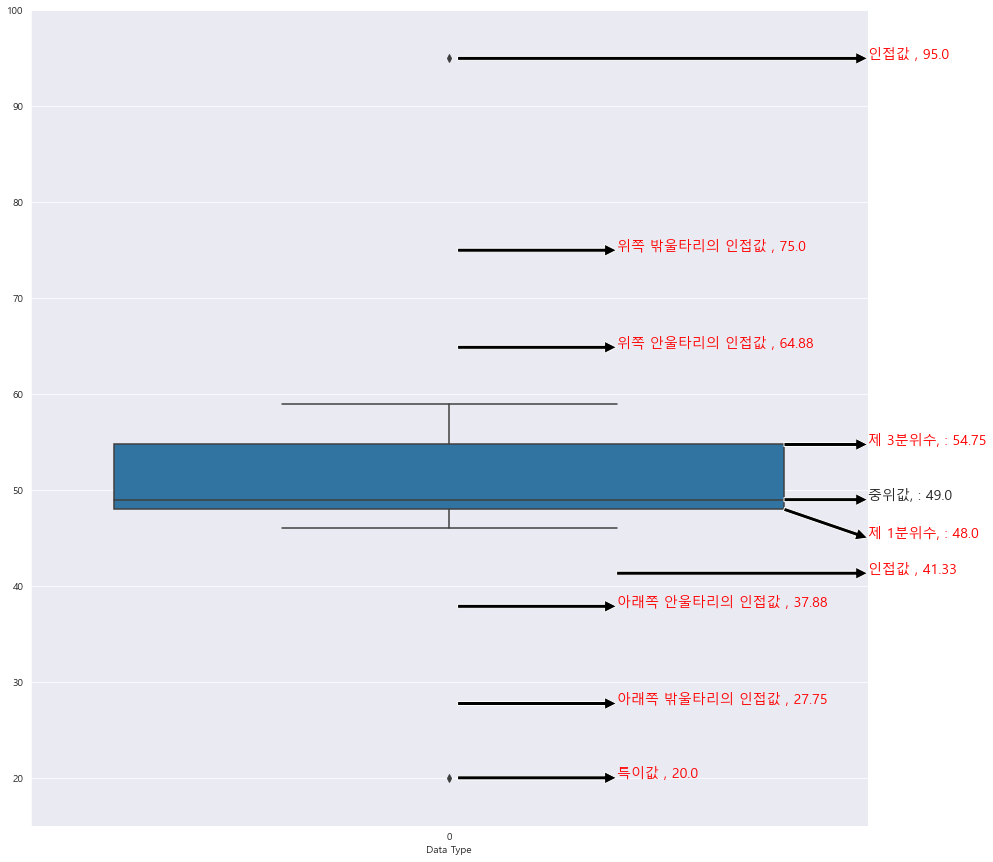

In [646]:
fig = plt.figure(figsize=(15,15))

ax = sns.boxplot(data = A)



n = len(B)
k = [25,50,75] #Q1
for i in k:
    m = int((n*i) / 100)
    P_25 = int((A[m-1] + A[m]) /2)
    print(P_25)


Q1 = round(B.quantile(.25)[0] , 2)
Q2 = round(B.quantile(.5)[0] , 2)
Q3 = round(B.quantile(.75)[0] , 2)

IQR = round(Q3 - Q1 , 2) #6.75
print("IQR: {}".format(IQR))

fl = round(Q1 - (1.5) * IQR ,2) #아래쪽 안 울타리
print('fl : {}'.format(fl))
fu = round(Q3 +(1.5) * IQR,2) #위쪽 안 울타리
print('fu : {}'.format(fu))
fL = round(Q1 - 3*IQR,2) #아래쪽 밖 울타리
print('fL : {}'.format(fL))
fU = round(Q3 + 3*IQR,2) #위쪽 밖 울타리
print('fU : {}'.format(fU))

print("B.quantile(0)[0] : {}".format(B.quantile(0)[0]))
print("B.quantile(1)[0] : {}".format(B.quantile(1)[0]))
print("B.quantile(.25)[0] : {}".format(B.quantile(.25)[0]))
ax.set_ylim(B.quantile(0)[0] -5, B.quantile(1)[0] +5)
ax.set_xlabel('Data Type')
plt.annotate('' , xy=(0.5, np.median(B)), xytext=(0.4 , np.median(B))  , arrowprops = dict(facecolor = 'black'))
plt.text(0.5, np.median(B), '중위값, : {}'.format(B.quantile(.5)[0]), fontsize=14)


plt.annotate('' , xy=(0.5, Q1-3), xytext=(0.4 , Q1)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.5, Q1-3, '제 1분위수, : {}'.format(Q1), fontsize=14 , color= 'red')

plt.annotate('' , xy=(0.5, Q3), xytext=(0.4 , Q3)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.5, Q3, '제 3분위수, : {}'.format(Q3), fontsize=14 , color= 'red')

plt.annotate('' , xy=(0.5, B.quantile(1)), xytext=(0.01 , B.quantile(1))  , arrowprops = dict(facecolor = 'black'))
plt.text(0.5, B.quantile(1), '인접값 , {}'.format(B.quantile(1)[0]), fontsize=14, color= 'red' )

plt.annotate('' , xy=(0.5, Q1 - IQR+0.08), xytext=(0.2 , Q1 - IQR+0.08)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.5, Q1 - IQR+0.08, '인접값 , {}'.format(Q1 - IQR+0.08), fontsize=14, color= 'red' ) #왜 다를까?

plt.annotate('' , xy=(0.2, B.quantile(0)), xytext=(0.01, B.quantile(0))  , arrowprops = dict(facecolor = 'black'))
plt.text(0.2, B.quantile(0), '특이값 , {}'.format(B.quantile(0)[0]), fontsize=14 , color= 'red')

plt.annotate('' , xy=(0.2, fl), xytext=(0.01, fl)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.2, fl, '아래쪽 안울타리의 인접값 , {}'.format(fl), fontsize=14 , color= 'red')


plt.annotate('' , xy=(0.2, fu), xytext=(0.01, fu)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.2, fu, '위쪽 안울타리의 인접값 , {}'.format(fu), fontsize=14 , color= 'red')


plt.annotate('' , xy=(0.2, fU), xytext=(0.01, fU)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.2, fU, '위쪽 밖울타리의 인접값 , {}'.format(fU), fontsize=14 , color= 'red')


plt.annotate('' , xy=(0.2, fL), xytext=(0.01, fL)  , arrowprops = dict(facecolor = 'black'))
plt.text(0.2, fL, '아래쪽 밖울타리의 인접값 , {}'.format(fL), fontsize=14 , color= 'red')



plt.show()